
# 探索电影数据集项目

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
     <ul>
     <li><a href="#popular">受欢迎的电影类型</a></li>
     <li><a href="#highrevenue">高票房的电影特征</a></li>
     </ul>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
我选择的数据集是TMBD数据集，里面包括从1960年到2015年的有关电影的信息。我将通过电影的类型和受欢迎程度来探讨什么样的电影类型受到欢迎？这些类型随着时间变化有着什么样的变化？高票房的电影有什么样的特征的？

In [1]:
#   导入语句
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#参数设置
sns.set_style('darkgrid')
pd.options.display.max_columns = 30
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

<a id='wrangling'></a>
## 数据整理

### 查看电影数据集并且评估。

In [3]:
# 加载电影数据集并查看
df = pd.read_csv("tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380


>当前数据中的imdb_id,homepage, overview对我们将要进行处理的问题没有帮助，再之后需要删除。
 对于类型genres中一行有多个数据的应该进行分类处理。
 数据集中给出了原本的budget, revenue, 和经过通货膨胀计算的adj,我们使用adj的两列进行分析，所以将会删除以上两列，同时对于budget_adj, revenue_adj 需要重命名。

### 评估数据 

In [4]:
# 查看数据集的样本数与列数
df.shape

(10866, 21)

> 当前数据集中有21列，10866条数据

In [5]:
#查看数据集重复的样本
df.duplicated().sum()

1

>只有1条重复的样本

In [6]:
#查看数据集中有缺失的特征
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#查看数据的基本统计信息
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,0.64644,14625701.09415,39823319.79339,102.07086,217.38975,5.97492,2001.32266,17551039.82289,51364363.25325
std,92130.13656,1.00018,30913213.83144,117003486.58209,31.38141,575.61906,0.93514,12.81294,34306155.72284,144632485.03997
min,5.00000,0.00007,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.25000,0.20758,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20669.00000,0.38386,0.00000,0.00000,99.00000,38.00000,6.00000,2006.00000,0.00000,0.00000
75%,75610.00000,0.71382,15000000.00000,24000000.00000,111.00000,145.75000,6.60000,2011.00000,20853251.08440,33697095.71731
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


In [8]:
#查看当前数据的类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>可以看到，有一些数据虽然不为空，但是最小值为0，如budget、runtime，其实也是有问题的。我们将会针对空值和0值对一些数据进行处理。同时，release_date的类型将会转换成时间类型



### 清理数据

In [9]:
#填充时间为0的列
df['runtime'].replace(0,df['runtime'].mean(),inplace = True)

In [10]:
#去重
df.drop_duplicates(inplace =True)
#检查是否还有空值
df.duplicated().sum()

0

### 创建类型与受欢迎程度数据集

In [11]:
#过滤，只保留探索类型与受欢迎程度的内容。
genre_popularity = df.loc[:,['id', 'popularity','release_year','genres']]
genre_popularity.head()

,id,popularity,release_year,genres
0,135397,32.98576,2015,Action|Adventure|Science Fiction|Thriller
1,76341,28.41994,2015,Action|Adventure|Science Fiction|Thriller
2,262500,13.11251,2015,Adventure|Science Fiction|Thriller
3,140607,11.17310,2015,Action|Adventure|Science Fiction|Fantasy
4,168259,9.33501,2015,Action|Crime|Thriller


In [12]:
#丢空
genre_popularity = genre_popularity.dropna(subset=['genres'])
#检查是否还有空值，如果没有了的话则返回空值
genre_popularity['genres'].notnull().any()

True

### 创建票房数据集

In [13]:
#查看是否有revenue不为0但是revenue_adj为0的情况，查看是否可以使用revenue来填充调整后的revenue_adj
df.query('revenue !=0 and revenue_adj ==0')['id'].count()

0

In [14]:
#过滤数据，只保留有收入的电影和需要的列。
revenue_df = df[df["revenue"]>0]
revenue_df = revenue_df.drop(['imdb_id','budget', 'revenue','homepage'],axis =1)
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 17 columns):
id                      4849 non-null int64
popularity              4849 non-null float64
original_title          4849 non-null object
cast                    4844 non-null object
director                4848 non-null object
tagline                 4385 non-null object
keywords                4614 non-null object
overview                4849 non-null object
runtime                 4849 non-null float64
genres                  4849 non-null object
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget_adj              4849 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(5), int64(3), object(9)
memory usage: 681.9+ KB


In [15]:
#填充空值
revenue_df.fillna("NoGiven",inplace = True)
revenue_df.notnull().any()

id                      True
popularity              True
original_title          True
cast                    True
director                True
tagline                 True
keywords                True
overview                True
runtime                 True
genres                  True
production_companies    True
release_date            True
vote_count              True
vote_average            True
release_year            True
budget_adj              True
revenue_adj             True
dtype: bool

In [16]:
#重命名列
revenue_df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'},inplace =True)
revenue_df.head(1)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.98576,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.00000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380


<a id='eda'></a>
## 受欢迎电影类型与高票房电影特征的分析


<a href='popular'></a>
### 受欢迎的电影都是哪些类型？

In [17]:
#查看受欢迎度的统计信息
genre_popularity['popularity'].describe()

count   10842.00000
mean        0.64746
std         1.00103
min         0.00007
25%         0.20821
50%         0.38453
75%         0.71539
max        32.98576
Name: popularity, dtype: float64

> 我们将用大于75%的部分当做受欢迎的标准，进行分析。

In [18]:
#只保留受欢迎的电影，同时将类型分列，只探索受欢迎度和类型的关系。
split_genres_df = genre_popularity.set_index(['id','popularity'])['genres'].str.split(r'|',expand = True).stack().reset_index(level=2,drop=True).reset_index(name="genres")
split_genres_df.head()

,id,popularity,genres
0,135397,32.98576,Action
1,135397,32.98576,Adventure
2,135397,32.98576,Science Fiction
3,135397,32.98576,Thriller
4,76341,28.41994,Action


Text(0, 0.5, '数量')

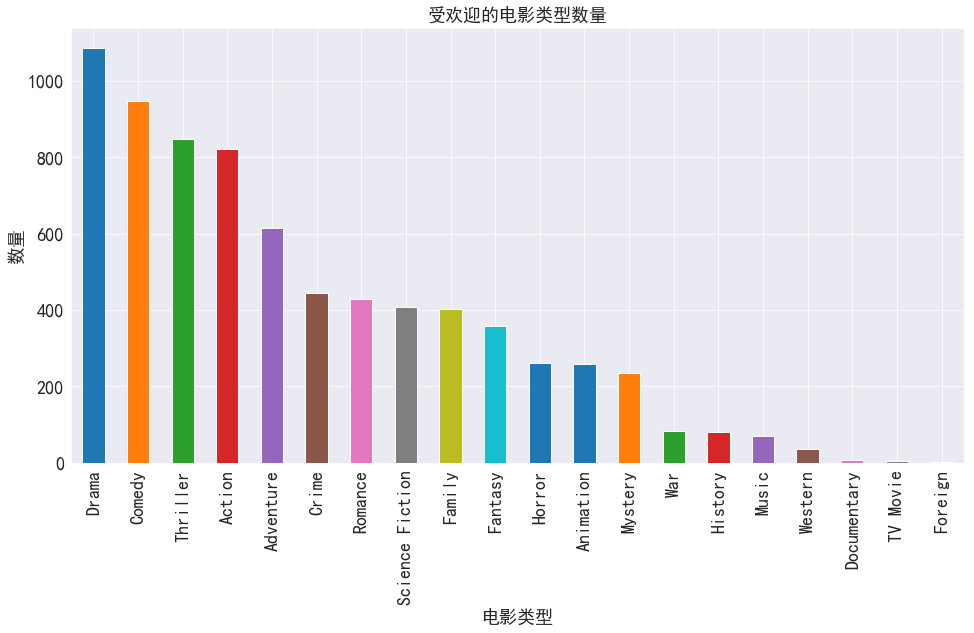

In [19]:
#可视化
split_genres_df.query('popularity > 0.715')['genres'].value_counts().plot(kind='bar',figsize = (16,8),fontsize= 18)
plt.title('受欢迎的电影类型数量',fontsize = 18)
plt.xlabel('电影类型',fontsize = 18)
plt.ylabel('数量',fontsize = 18)

> 根据现有的数据来看，可以看出在受欢迎的电影类型中最受欢迎的是Drama剧情片。超过了1000部，而comedy喜剧、thriller恐怖片、action动作片也十分受欢迎，超过了800部。

#### 前5种受欢迎的电影类型和年代有什么关系？

In [20]:
#将每一年受欢迎度75分位添加到表格中
high = genre_popularity.groupby("release_year")["popularity"].quantile(q = 0.75)
split_year_df = genre_popularity.set_index('release_year')
split_year_df["high"] = high
split_year_df = split_year_df.reset_index()
split_year_df.tail(1)

,release_year,id,popularity,genres,high
10841,1966,22293,0.03592,Horror,0.39183


In [21]:
#筛选出每一年受欢迎的电影
split_year_df = split_year_df.query('popularity>high')

In [22]:
#将受欢迎的电影按类型拆分
split_year_df = split_year_df.set_index(['id','release_year','popularity'])['genres'].str.split(r'|',expand = True).stack().reset_index(level=3,drop=True).reset_index(name="genres")
split_year_df.head()

,id,release_year,popularity,genres
0,135397,2015,32.98576,Action
1,135397,2015,32.98576,Adventure
2,135397,2015,32.98576,Science Fiction
3,135397,2015,32.98576,Thriller
4,76341,2015,28.41994,Action


In [23]:
#增加电影所属年代列
split_year_df['decade'] = split_year_df.release_year//10*10
split_year_df.head(1)

,id,release_year,popularity,genres,decade
0,135397,2015,32.98576,Action,2010


In [24]:
#统计电影类型在每一个年代的数量和排名。
decade_df = split_year_df.groupby('decade')['genres'].value_counts().to_frame(name='count').reset_index()
decade_df["rank"] = decade_df.groupby('decade')['count'].rank(ascending=0,method='min')
decade_df.head(1)

,decade,genres,count,rank
0,1960,Drama,43,1.00000


In [25]:
#统计电影类型在每一个年代的平均受欢迎程度。
mean_col = split_year_df.groupby(['decade','genres'])['popularity'].mean()
decade_df = decade_df.set_index(['decade','genres'])
decade_df["average"] = mean_col
decade_df = decade_df.reset_index()
decade_df.head(1)

,decade,genres,count,rank,average
0,1960,Drama,43,1.00000,0.89192


In [26]:
#创建前5名最受欢迎的电影类型切片
Drama = decade_df.query('genres in "Drama"')
Comedy = decade_df.query('genres in "Comedy"')
Thriller = decade_df.query('genres in "Thriller"')
Action = decade_df.query('genres in "Action"')
Adventure = decade_df.query('genres in "Adventure"')

Text(0, 0.5, '排名')

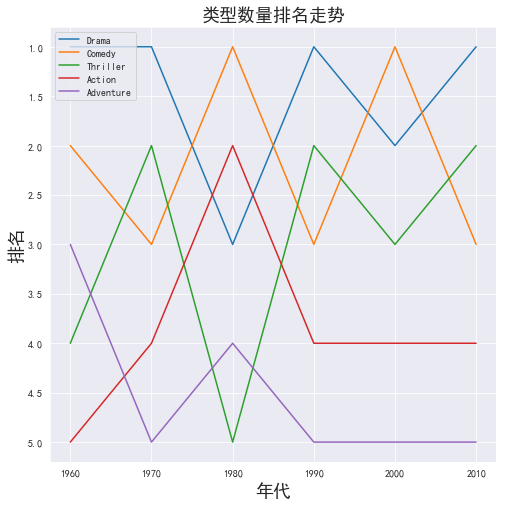

In [27]:
#查看这些电影类型在每个年代的排名变化
ax1 = Drama.plot(x = "decade",y = "rank",figsize = (8,8),label = "Drama")
Comedy.plot(ax = ax1,x = "decade",y = "rank",label = "Comedy")
Thriller.plot(ax = ax1,x = "decade",y = "rank",label = "Thriller")
Action.plot(ax = ax1,x = "decade",y = "rank",label = "Action")
Adventure.plot(ax = ax1,x = "decade",y = "rank",label = "Adventure")
plt.gca().invert_yaxis()
plt.title('类型数量排名走势',fontsize = 18)
plt.xlabel('年代',fontsize = 18)
plt.ylabel('排名',fontsize = 18)

> 可以看到这五种类型始终都是前5名。在受欢迎数量上领先的Drama戏剧类型和Comedy喜剧类型始终都在前3名之中，而数量上排名第五的Adventure冒险类型始终都在3~5名之中徘徊。

Text(0, 0.5, '受欢迎度')

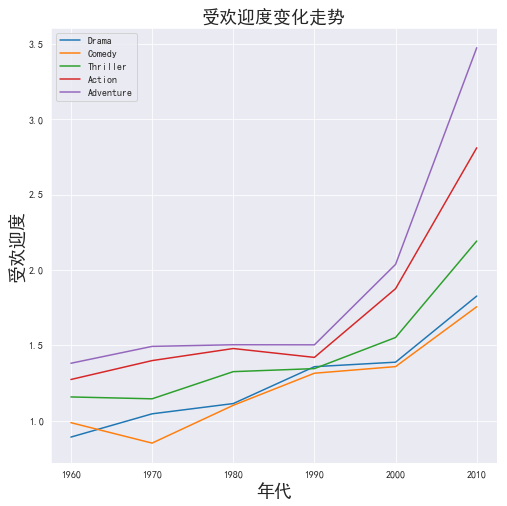

In [28]:
ax2 = Drama.plot(x = "decade",y = "average",figsize = (8,8),label = "Drama")
Comedy.plot(ax = ax2,x = "decade",y = "average",label = "Comedy")
Thriller.plot(ax = ax2,x = "decade",y = "average",label = "Thriller")
Action.plot(ax = ax2,x = "decade",y = "average",label = "Action")
Adventure.plot(ax = ax2,x = "decade",y = "average",label = "Adventure")
plt.title('受欢迎度变化走势',fontsize = 18)
plt.xlabel('年代',fontsize = 18)
plt.ylabel('受欢迎度',fontsize = 18)

> 受欢迎度来看，整体都是呈上升趋势。虽然Adventure冒险类型在数量上排名第五，但是在每一个年代的受欢迎程度都是最高。而喜剧与剧情片在总的受欢迎程度上是在这五种中偏低的。

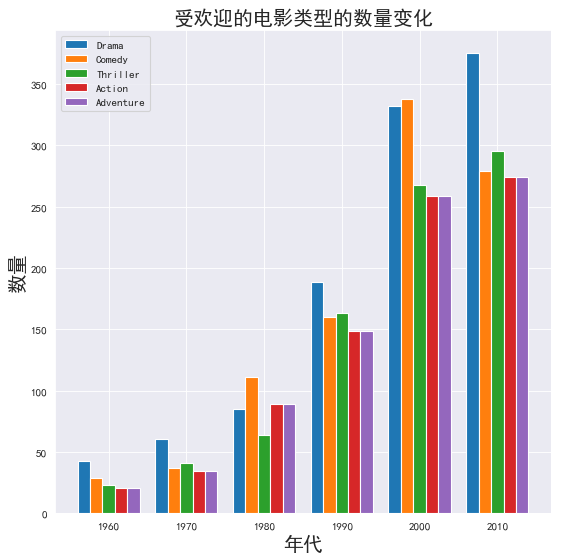

In [29]:
#数量变化可视化
total_width, n = 0.8, 5
width = total_width / n
x = np.arange(6) - (total_width - width) / 2
a = Drama["count"].values
b = Comedy["count"].values
c = Thriller["count"].values
d = Action["count"].values
e = Adventure["count"].values
plt.figure(figsize=(8,8), dpi=80)
plt.bar(x,a,width=width, label='Drama')
plt.bar(x + width, b, width=width, label='Comedy')
plt.bar(x + 2 * width, c, width=width, label='Thriller')
plt.bar(x + 3 * width, d, width=width, label='Action')
plt.bar(x + 4 * width, d, width=width, label='Adventure')
plt.xticks(x + 2 * width,Drama["decade"].values)
plt.legend()
plt.title('受欢迎的电影类型的数量变化',fontsize = 18)
plt.xlabel('年代',fontsize = 18)
plt.ylabel('数量',fontsize = 18)
plt.show()

>整体来看，这几种电影类型中，除了喜剧之外，其他的类型受欢迎的数量都是越来越多的。在80年代受欢迎的影片中类型最多的是喜剧片，而到了10年代，受欢迎的喜剧数量剩至低于00年代。但是由于数据中最后只到2015年，所以不一定准确。

<a id ='highrevenue'></a>
### 票房高的电影有哪些特点？

In [30]:
#查看票房与其它几个因素的相关性
revenue_df.corr()["revenue"]

id             -0.11545
popularity      0.56175
runtime         0.26391
vote_count      0.66650
vote_average    0.24232
release_year   -0.09945
budget          0.59328
revenue         1.00000
Name: revenue, dtype: float64

>从当前的相关性来看，票房与受欢迎程度popularity、投票人数vote_count和预算budget有很大的正相关性。平均得分vote_average的关联性似乎有些关联。接下来会查看以下几个特征与票房的关系。

In [31]:
#查看收入数据
revenue_df["revenue"].describe()

count         4849.00000
mean     115100887.62834
std      198855667.98321
min              2.37071
25%       10465848.09117
50%       43956661.15838
75%      131648235.91364
max     2827123750.41189
Name: revenue, dtype: float64

In [32]:
#将票房收入分层
bin_edges = [2.37, 10465848.09, 43956661.16, 131648235.91, 2827123750.41]
bin_names = [ 'low', 'median', 'mod_high', 'high']
revenue_df['revenue_levels'] = pd.cut(revenue_df['revenue'], bin_edges, labels=bin_names)
revenue_df.head(1)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,revenue_levels
0,135397,32.98576,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.00000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380,high


In [33]:
#查看高票房电影特征
revenue_df.query('revenue_levels in "high"').describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,1212.00000,1212.00000,1212.00000,1212.00000,1212.00000,1212.00000,1212.00000,1212.00000
mean,28932.41667,2.02685,116.40759,1120.25825,6.41931,1999.19307,77333983.68643,350522755.82377
std,54831.99218,2.15849,27.83754,1261.53121,0.71594,12.60683,56070614.17692,272334897.81788
min,11.00000,0.01750,69.00000,10.00000,4.10000,1960.00000,0.00000,131648235.91364
25%,1405.00000,0.93850,99.00000,287.00000,5.90000,1993.00000,34247780.61463,177257889.60854
50%,9320.00000,1.48068,113.00000,652.50000,6.40000,2002.00000,67764497.40746,253402619.87737
75%,22815.75000,2.41241,128.25000,1472.25000,6.90000,2009.00000,110099988.08601,421176969.42819
max,417859.00000,32.98576,705.00000,9767.00000,8.30000,2015.00000,368371256.18476,2789712242.27745


Text(0, 0.5, '受欢迎度')

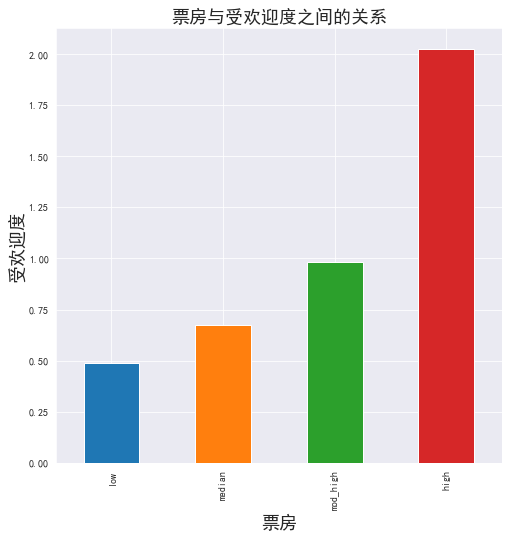

In [34]:
#查看票房与受欢迎度之间的关系
revenue_df.groupby('revenue_levels')['popularity'].mean().plot(kind="bar",figsize=(8,8))
plt.title('票房与受欢迎度之间的关系',fontsize = 18)
plt.xlabel('票房',fontsize = 18)
plt.ylabel('受欢迎度',fontsize = 18)

>票房高的电影受欢迎度的平均值在2左右，高于票房低的电影。

Text(0, 0.5, '投票数')

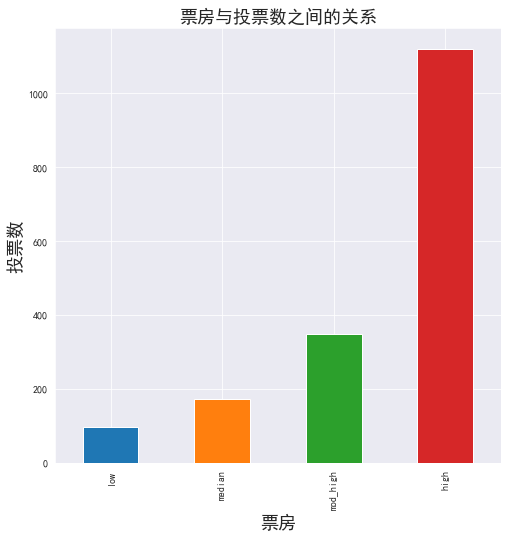

In [35]:
revenue_df.groupby('revenue_levels')['vote_count'].mean().plot(kind="bar",figsize=(8,8))
plt.title('票房与投票数之间的关系',fontsize = 18)
plt.xlabel('票房',fontsize = 18)
plt.ylabel('投票数',fontsize = 18)

>票房高的电影明显比投票低的电影投票数更多，平均投票数有1120左右。

Text(0, 0.5, '投票分数')

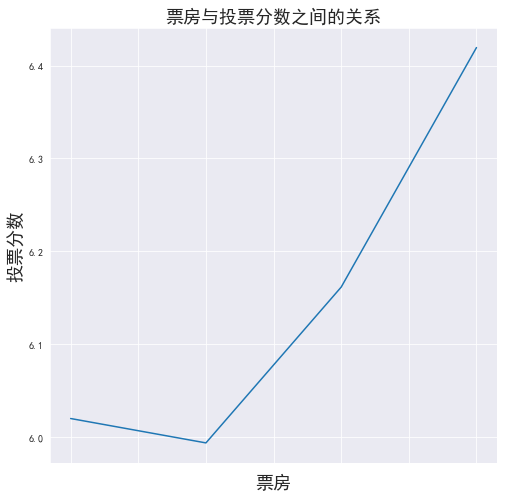

In [36]:
revenue_df.groupby('revenue_levels')['vote_average'].mean().plot(kind="line",figsize=(8,8))
plt.title('票房与投票分数之间的关系',fontsize = 18)
plt.xlabel('票房',fontsize = 18)
plt.ylabel('投票分数',fontsize = 18)

>票房高的电影投票分数也高，但是似乎票房和得票分数的成绩没什么关联性。得分大约在6.4分左右。

In [37]:
#删除预算为0的电影
temp_df = revenue_df.query('budget>0')

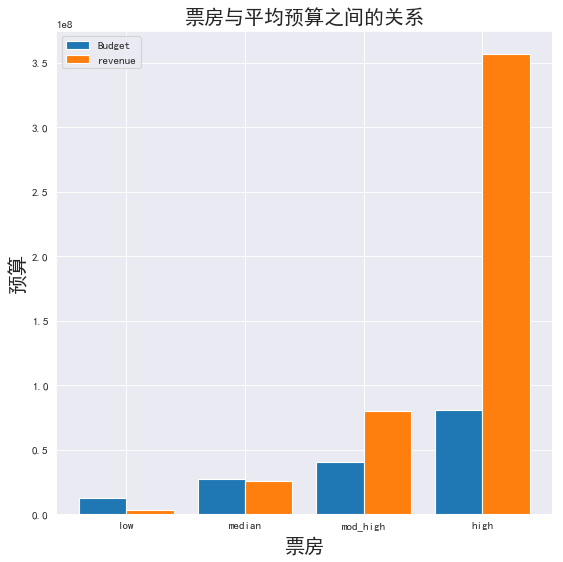

In [38]:
#查看预算与电影之间的关系
total_width, n = 0.8, 2
width = total_width / n
x = np.arange(4) - (total_width - width) / 2
a = temp_df.groupby('revenue_levels')['budget'].mean().values
b = temp_df.groupby('revenue_levels')['revenue'].mean().values
plt.figure(figsize=(8,8), dpi=80)
plt.bar(x,a,width=width, label='Budget')
plt.bar(x + width, b, width=width, label='revenue')
plt.xticks(x + width/2,bin_names)
plt.legend()
plt.title('票房与平均预算之间的关系',fontsize = 18)
plt.xlabel('票房',fontsize = 18)
plt.ylabel('预算',fontsize = 18)
plt.show()

>票房高的电影的预算普遍也高，而且票房低的电影的平均预算大于平均收入，而票房高的电影的平均预算是低于平均收入的。

In [39]:
#统计高票房的电影的发行月份
high_revenue = revenue_df.query('revenue_levels=="high"')
high_revenue["release_date"] = pd.to_datetime(high_revenue["release_date"])
high_revenue["release_month"] = high_revenue["release_date"].dt.month
high_revenue.head(1)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,revenue_levels,release_month
0,135397,32.98576,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.00000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380,high,6


Text(0, 0.5, '数量')

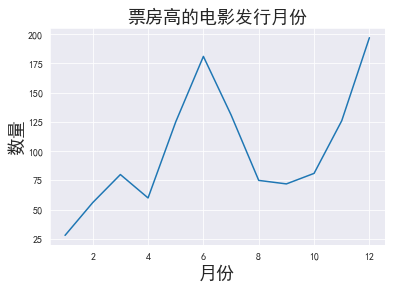

In [40]:
high_revenue["release_month"].value_counts().sort_index().plot()
plt.title('票房高的电影发行月份',fontsize = 18)
plt.xlabel('月份',fontsize = 18)
plt.ylabel('数量',fontsize = 18)

>高票房的电影在6月份与12月份发行的最多，1月份最少。可能和暑假与圣诞节的观影人数变多有关。

<a id='conclusions'></a>
## 结论
<ol>
<li><p>受欢迎的电影类型</p></li>
    <ol>
    <li>根据数据集中受欢迎度在前75%的电影类型的统计结果来看，在数据集之中欢迎的电影类型数量的前五名是:
        <ol>
        <li>Drama剧情片</li>
        <li>Comedy喜剧</li>
        <li>Thriller恐怖片</li>
        <li>Action动作片</li>
        <li>Adventure冒险片</li>
        </ol>
     </li>
    <li>我使用了每一年受欢迎程度在前75%的电影类型，对他们进行了按年代划分得出的数据集来分析了之前得出的类型的前五名随着年代变化的情况。但是数据集中的10年代只到了2015年，比其它年代少了五年。也没有经过统计检验。所以这些类型和年代的关系只是临时的结论。</li>
        <ol>
        <li>随着年代变化，五种类型的数量始终在受欢迎的电影的前五名。</li>
        <li>在受欢迎度上，五种类型的受欢迎度越来越高，而且冒险片的受欢迎度在每一个年代都是最高。</li>
        <li>在拍片数量上，受欢迎的电影数量越来越多。</li>
        </ol>
    </ol>
<li><p>票房高的电影特征</p></li>在数据集中，把票房分为了低、中、次高、高四挡。探索了电影与发行月份、预算、投票分数、投票人数、受欢迎度中的特征。但是没有经过统计检验，所以不代表高票房和上述的特征具有因果性。
    <ol>
    <li>高票房的电影的受欢迎度平均在2左右，对比来看，要比低票房的电影的受欢迎度来得高。</li>
    <li>高票房的电影的平均投票人数是在1120左右，比低票房的投票数更多。</li>
    <li>高票房的电影的平均分在6分左右，比低票房来得高。但是中票房的平均分比低票房来得低，所以通过现在的数据无法得出票房高平均分就一定高的结论。</li>
    <li>高票房的电影平均预算在8千万左右，比低票房的预算来得高。由于剔除了票房为0和预算为0的数据，所以当前的数据量非常小。无法确定这个特征是否准确。</li>
    <li>高票房的电影最多选在了6月份与12月份上映。</li>    
    </ol>
</ol>

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TBMD-investigate.ipynb'])

0